In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings

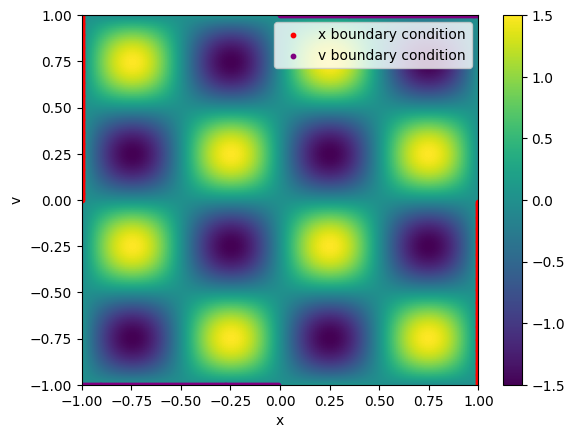

In [25]:
# Parameters
T = 1
x_max, v_max = 1, 1
x_min, v_min = -1, -1
dx, dv = 1/100, 1/100
dt = 1/200
x_grid_points = int((x_max - x_min)/dx) + 1
v_grid_points = int((v_max - v_min)/dv) + 1
time_steps = int(T/dt) + 1

# Grid creation
x_grid = np.linspace(x_min, x_max, x_grid_points)
v_grid = np.linspace(v_min, v_max, v_grid_points)
t_grid = np.linspace(0, T, time_steps)
grid = np.zeros((time_steps, x_grid_points, v_grid_points))
error = np.zeros((time_steps, x_grid_points, v_grid_points))

# Initial condition
X, V = np.meshgrid(x_grid, v_grid)
grid[0, :, :] = 1.5 * np.sin(2*np.pi*X) * np.sin(2*np.pi*V)
error[0, :, :] = np.zeros((x_grid_points, v_grid_points))

# Periodic function for acceleration
def mu(x):
    return np.sin(np.pi*x)

# Boundary conditions
# Marking and setting boundary conditions
for v_idx, v in enumerate(v_grid):
    if v > 0:
        grid[:, 0, v_idx] = 0  # x = x_min
    if v < 0:
        grid[:, -1, v_idx] = 0  # x = x_max

for x_idx, x in enumerate(x_grid):
    if mu(x) < 0:
        grid[:, x_idx, 0] = 0  # v = v_min
    if mu(x) > 0:
        grid[:, x_idx, -1] = 0  # v = v_max

# Marking the points on the graph
plt.scatter(np.concatenate(([x_min]*len(v_grid[v_grid >= 0]), [x_max]*len(v_grid[v_grid < 0]))), 
            np.concatenate((v_grid[v_grid >= 0], v_grid[v_grid < 0])), 
            color='red', s=10, label='x boundary condition')
plt.scatter(np.concatenate((x_grid[mu(x_grid) < 0], x_grid[mu(x_grid) >= 0])), 
            np.concatenate(([v_min]*len(x_grid[mu(x_grid) < 0]), [v_max]*len(x_grid[mu(x_grid) >= 0]))), 
            color='purple', s=10, label='v boundary condition')


plt.imshow(grid[0, :, :], aspect='auto', extent=[x_min, x_max, v_min, v_max])
plt.xlabel('x')
plt.ylabel('v')
plt.colorbar()
plt.legend()
plt.show()


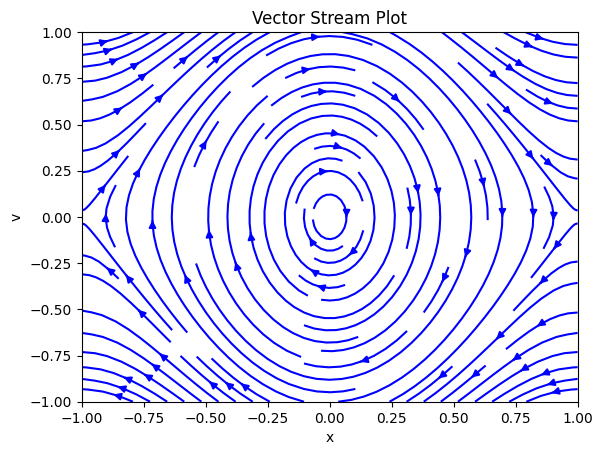

In [43]:
v_ext = (v_grid*np.ones((time_steps, x_grid_points))).T
a_ext = - mu(x_grid)*np.ones((time_steps, x_grid_points))

plt.streamplot(x_grid, v_grid, v_ext, a_ext, color='blue')
plt.xlabel('x')
plt.ylabel('v')
plt.title('Vector Stream Plot')
plt.show()


In [46]:
for t in range(1, 2):
    for x_idx, x in enumerate(x_grid[100:101]):
        for v_idx, v in enumerate(v_grid[95:96]):
            print(x, v)

            # departure point finding algorithm
            x_dep, v_dep = x, v
            x_dep_idx, v_dep_idx = x_idx, v_idx
            x_dep_res, v_dep_res = 0, 0
            for i in range(10):
                x_change, v_change = v_ext[x_dep_idx, v_dep_idx] + , a_ext[x_dep_idx, v_dep_idx]
                x_dep, v_dep = x_dep - x_change*dt - 0.5*v_change*dt**2, v_dep - v_change*dt
                x_dep_idx, v_dep_idx = int((x_dep - x_min)/dx), int((v_dep - v_min)/dv)
                x_dep_res, v_dep_res = x_dep - x_min - x_dep_idx*dx, v_dep - v_min - v_dep_idx*dv

            print(x_dep, v_dep)

0.0 -0.04999999999999993
0.004979306437728427 -0.05827742490863007
